In [2]:
%load_ext autoreload
%autoreload 2


from util import *
from myalgorithm import algorithm



In [4]:

import pandas as pd
import json
import os

data = []

# Loop through each file
for i in range(1,19):
    problem_file = f'C:/Users/sky07/Desktop/OneDrive/고려대학교/2024-1/Opti Challenge/stage1_problems/STAGE1_{i}.json'
    with open(problem_file, 'r') as f:
        prob = json.load(f)
    print(f"-------------------------{i}번째 문제------------------------------------------------------------------")
    timelimit = 60

    K = prob['K']

    ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
    ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

    DIST = np.array(prob['DIST'])
    for r in ALL_RIDERS:
        r.T = np.round(DIST/r.speed + r.service_time)

    alg_start_time = time.time()

    exception = None

    solution = None
    try:
        # Run algorithm!
        solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
    except Exception as e:
        exception = f'{e}'


    alg_end_time = time.time()

    with open(problem_file, 'r') as f:
        prob = json.load(f)

    K = prob['K']

    ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
    ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

    DIST = np.array(prob['DIST'])
    for r in ALL_RIDERS:
        r.T = np.round(DIST/r.speed + r.service_time)

    checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

    checked_solution['time'] = alg_end_time - alg_start_time
    checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
    checked_solution['exception'] = exception

    checked_solution['prob_name'] = prob['name']
    checked_solution['prob_file'] = problem_file

    checked_solution

    # Add the data to the list (modify this part based on the structure of your JSON files)
    data.append(prob)

# Convert the list of data into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
import ace_tools as tools; tools.display_dataframe_to_user(name="Results", dataframe=df)





---------------------------------------------------------------
number of len one bundles: 71
N: 174
time: 25.776586294174194
Best obj = 4553.394
WALK: 총 9개
  길이 2: 8개
  길이 3: 1개
BIKE: 총 59개
  길이 2: 45개
  길이 3: 13개
  길이 4: 1개
CAR: 총 105개
  길이 1: 70개
  길이 2: 27개
  길이 3: 8개
---------------------------------------------------------------------------------------
number of len one bundles: 70
N: 173
time: 26.659311532974243
Best obj = 4532.661999999999
WALK: 총 9개
  길이 2: 8개
  길이 3: 1개
BIKE: 총 60개
  길이 2: 45개
  길이 3: 14개
  길이 4: 1개
CAR: 총 103개
  길이 1: 69개
  길이 2: 26개
  길이 3: 8개
---------------------------------------------------------------------------------------
number of len one bundles: 69
N: 172
time: 27.374778270721436
Best obj = 4518.017333333333
WALK: 총 9개
  길이 2: 8개
  길이 3: 1개
BIKE: 총 59개
  길이 2: 44개
  길이 3: 14개
  길이 4: 1개
CAR: 총 103개
  길이 1: 68개
  길이 2: 26개
  길이 3: 9개
---------------------------------------------------------------------------------------
number of len one bundles: 

ModuleNotFoundError: No module named 'ace_tools'

In [5]:
df

,name,K,RIDERS,ORDERS,DIST
0,STAGE1_1,100,"[[BIKE, 5.291005291005291, 100, 60, 8000, 120,...","[[0, 28, 35.99762786853281, 125.98258379191876...","[[0, 3645, 5146, 5902, 3465, 4475, 2941, 7568,..."
1,STAGE1_2,100,"[[BIKE, 5.291005291005291, 100, 60, 8000, 120,...","[[0, 17, 36.01112685853281, 126.01371947191878...","[[0, 1978, 2606, 2545, 5174, 1860, 4605, 2669,..."
2,STAGE1_3,200,"[[BIKE, 5.291005291005291, 100, 60, 6000, 120,...","[[0, 39, 35.99996121853281, 125.99833229191876...","[[0, 2535, 4118, 2367, 2735, 2019, 4553, 3457,..."
3,STAGE1_4,200,"[[BIKE, 5.291005291005291, 100, 60, 6000, 120,...","[[0, 29, 35.99898981853281, 126.03830090191876...","[[0, 4478, 6082, 1487, 5970, 7707, 3145, 9976,..."
4,STAGE1_5,300,"[[BIKE, 5.291005291005291, 100, 60, 5000, 120,...","[[0, 3, 36.00107201853281, 125.98799987191876,...","[[0, 1493, 4604, 1236, 5410, 3093, 1251, 404, ..."
5,STAGE1_6,300,"[[BIKE, 5.291005291005291, 100, 60, 9000, 120,...","[[0, 0, 36.00104422853281, 125.98722216191878,...","[[0, 1284, 1913, 1549, 2134, 3214, 1604, 2241,..."
6,STAGE1_7,100,"[[BIKE, 5.291005291005291, 100, 60, 8000, 120,...","[[0, 46, 35.99911854537225, 126.0182564357584,...","[[0, 724, 3455, 6708, 2540, 3994, 1149, 1001, ..."
7,STAGE1_8,100,"[[BIKE, 5.291005291005291, 100, 60, 8000, 120,...","[[0, 0, 35.99561876537225, 126.0080630257584, ...","[[0, 2035, 7324, 2659, 6733, 3838, 3794, 3921,..."
8,STAGE1_9,200,"[[BIKE, 5.291005291005291, 100, 60, 6000, 120,...","[[0, 24, 36.004256145372246, 125.9797042457584...","[[0, 6260, 3883, 5211, 949, 5825, 966, 2651, 1..."
9,STAGE1_10,200,"[[BIKE, 5.291005291005291, 100, 60, 6000, 120,...","[[0, 5, 36.02219831537225, 125.9688991757584, ...","[[0, 4936, 7035, 4823, 5701, 9793, 8055, 6650,..."


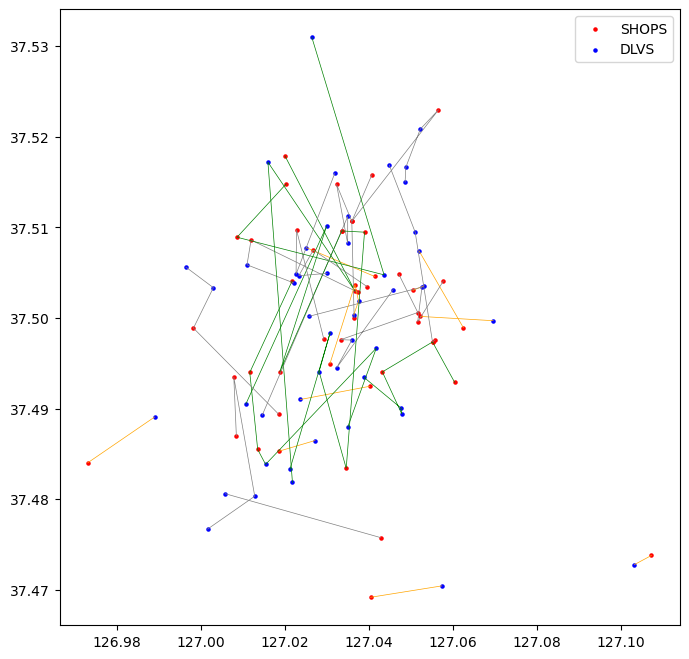

In [17]:
draw_route_solution(ALL_ORDERS, checked_solution)

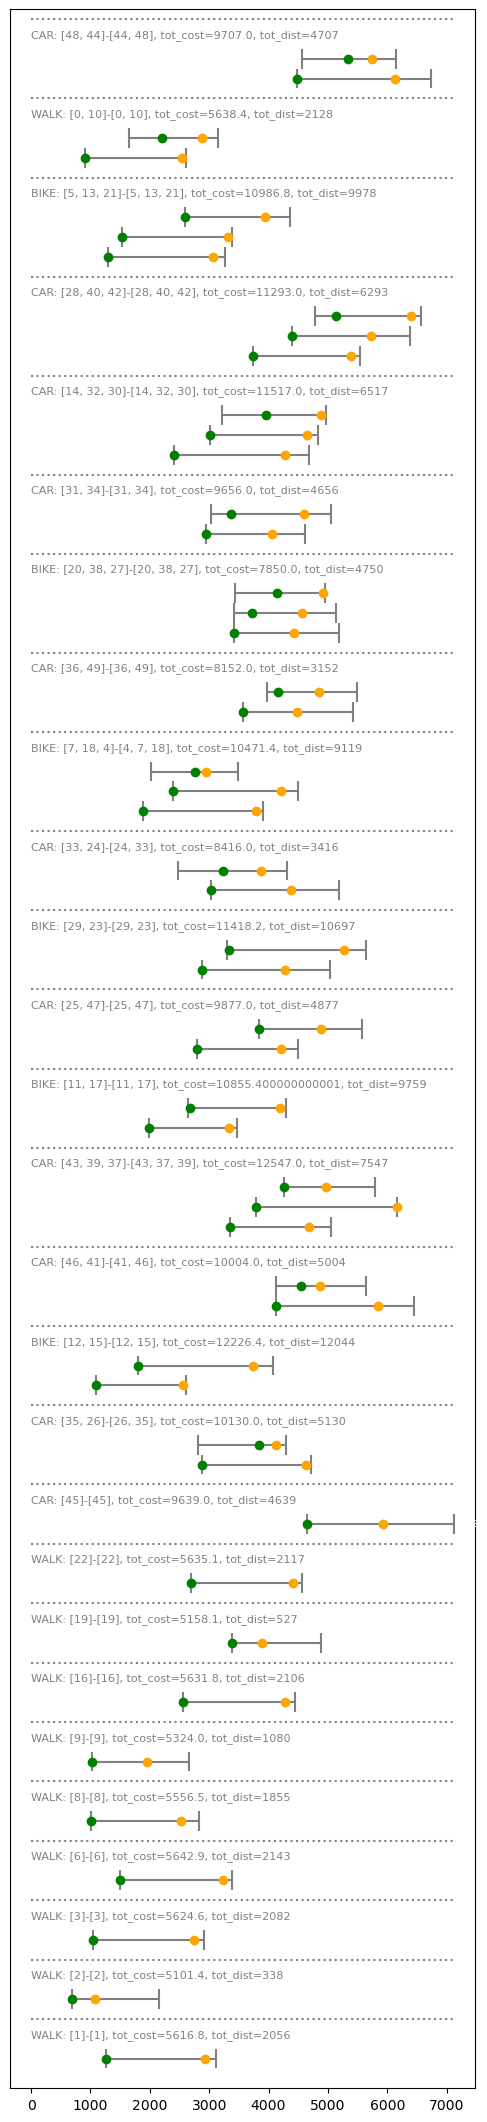

In [19]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)